In [1]:
from chebgreen import ChebGreen
import numpy as np
import matplotlib.pyplot as plt

from chebgreen.chebpy2 import Quasimatrix
from chebgreen.chebpy2.chebpy import chebfun
from chebgreen.chebpy2 import Chebfun2

Loading settings from /Users/hsharsh/chebgreen/examples/settings.ini.

ChebGreen settings:
[MATLAB]
nsample = 100
lambda = 0.01
nf = 500
nu = 500
noise = 0

[GREENLEARNING]
trainratio = 0.95
epochs_adam = 5000
epochs_lbfgs = 0
initlearningrate = 0.001
stepsize = 1000
decayrate = 0.9
layerconfig = [50,50,50,50]
activation = rational

[GENERAL]
precision = 32

MATLAB Path = /Applications/MATLAB_R2023b.app/bin/matlab
PyTorch device = mps


In [2]:
%%time
Theta = [0.8,0.9,0.95]
theta_ = 0.85
domain = [-np.pi/2,np.pi/2,-np.pi/2,np.pi/2]
generateData = True
script = "generate_fractional"
example = "fractional_laplacian"
dirichletBC = False

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 5.25 μs


In [3]:
%%time
model = ChebGreen(Theta, domain, generateData, script, example, dirichletBC)

Generating dataset for example 'fractional_laplacian'
Dataset found for Theta = 0.80. Skipping dataset generation.
Dataset found for Theta = 0.90. Skipping dataset generation.
Dataset found for Theta = 0.95. Skipping dataset generation.
-------------------------------------------------------------------------------

Generating chebfun2 models:
Found saved model, Loading model for example 'fractional_laplacian' at Theta = 0.80
Learning a chebfun model for example 'fractional_laplacian' at Theta = 0.80
Chebfun model added for example 'fractional_laplacian' at Theta = 0.80

Found saved model, Loading model for example 'fractional_laplacian' at Theta = 0.90
Learning a chebfun model for example 'fractional_laplacian' at Theta = 0.90
Chebfun model added for example 'fractional_laplacian' at Theta = 0.90

Found saved model, Loading model for example 'fractional_laplacian' at Theta = 0.95
Learning a chebfun model for example 'fractional_laplacian' at Theta = 0.95
Chebfun model added for exampl

In [4]:
model.G

{0.8: chebfun2 object
      domain       rank               corner values
 [-1.571,1.571] x [-1.571,1.571]     92       [1.628 1.564 1.556 1.621]
 vertical scale = 1.670638,
 0.9: chebfun2 object
      domain       rank               corner values
 [-1.571,1.571] x [-1.571,1.571]     92       [1.471 1.435 1.431 1.467]
 vertical scale = 1.474646,
 0.95: chebfun2 object
      domain       rank               corner values
 [-1.571,1.571] x [-1.571,1.571]     92       [1.395 1.382 1.387 1.403]
 vertical scale = 1.402656}

In [5]:
model.N

{0.8: chebfun (1 smooth piece)
        interval       length     endpoint values
 [    -1.6,     1.6]       32   6.9e-05   -3e-05
 vertical scale = 8.9e-05,
 0.9: chebfun (1 smooth piece)
        interval       length     endpoint values
 [    -1.6,     1.6]       25    -5e-05 -6.5e-05
 vertical scale = 8.6e-05,
 0.95: chebfun (1 smooth piece)
        interval       length     endpoint values
 [    -1.6,     1.6]       26   9.4e-05 -7.3e-05
 vertical scale = 9.6e-05}

In [6]:
model.G[0.8]

chebfun2 object
     domain       rank               corner values
[-1.571,1.571] x [-1.571,1.571]     92       [1.628 1.564 1.556 1.621]
vertical scale = 1.670638

CPU times: user 11.5 s, sys: 354 ms, total: 11.9 s
Wall time: 14.2 s


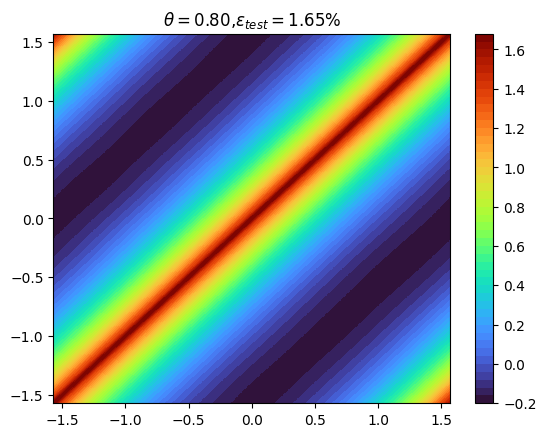

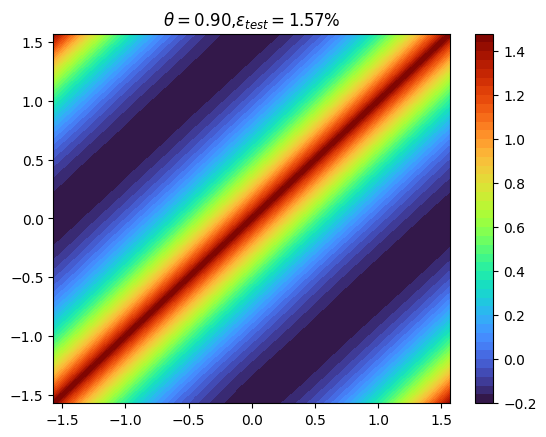

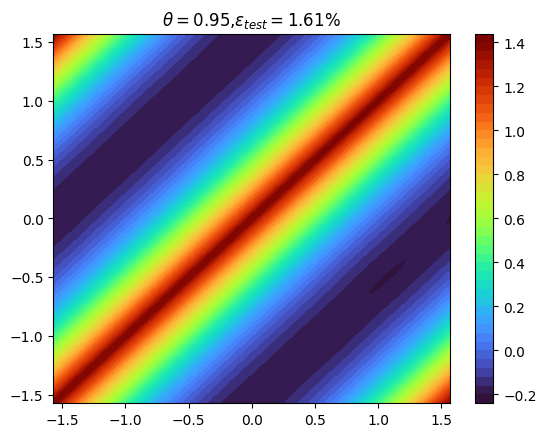

In [7]:
%%time
for t in Theta:
    fig = plt.figure()
    model.G[t].plot(fig = fig)
    error = model.computeEmpiricalError(t)
    plt.title(f"$\\theta = {{{t:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\\%$")

In [8]:
# vmin, vmax = -0.44,2.8
# Gplot = model.G[0.95]

# xx = np.linspace(domain[0],domain[1],2000)
# yy = np.linspace(domain[2],domain[3],2000)
# x, y = np.meshgrid(xx,yy)
# Gplot = Gplot[x,y]

# fig = plt.figure(figsize = (13,10), frameon=False)
# plt.axis('off')
# plt.gca().set_aspect('equal', adjustable='box')
# levels = np.linspace(vmin, vmax, 50, endpoint = True)
# plt.contourf(x,y,Gplot, levels = levels, cmap = 'jet', vmin = vmin, vmax = vmax)
# # ticks = np.linspace(vmin, vmax, 10, endpoint=True)
# # cbar = plt.colorbar(ticks = ticks, modeltion = 0.046, pad = 0.04)

# fig.savefig('model-C.png', dpi = fig.dpi, bbox_inches='tight', pad_inches=0)

In [9]:
%%time
u,s,v = model.G[Theta[0]].svd()

CPU times: user 2.87 s, sys: 234 ms, total: 3.1 s
Wall time: 3.86 s


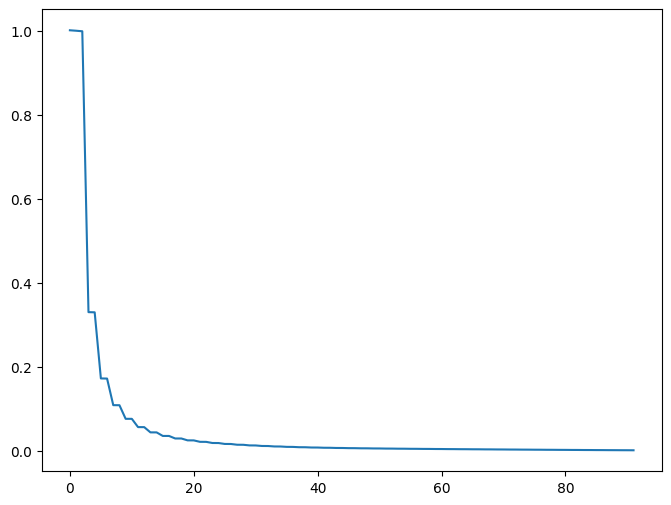

In [10]:
fig = plt.figure(figsize = (8,6))
plt.plot(s)

(0.0, 1.0)

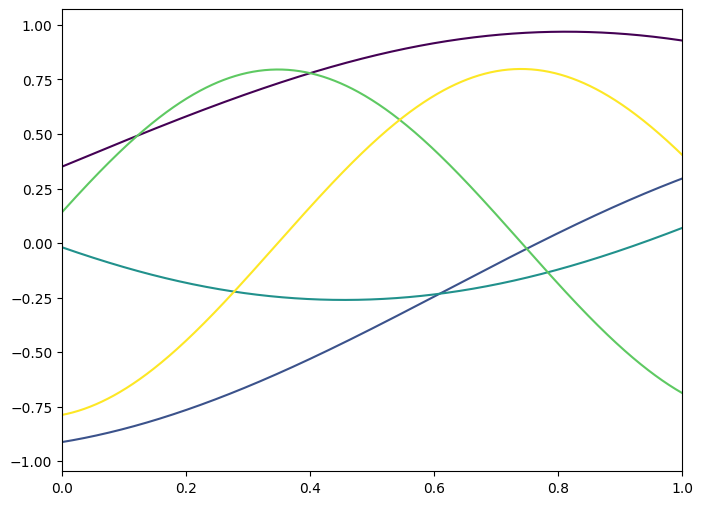

In [11]:
# i = slice(10,20)
i = slice(0,5)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot(fig = fig)
# print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [12]:
%%time
Ginterp, Ninterp = model.generateNewModel(theta_)

CPU times: user 17.7 s, sys: 499 ms, total: 18.2 s
Wall time: 20.9 s


In [13]:
validation = ChebGreen([theta_], domain, generateData, script, example, dirichletBC)

Generating dataset for example 'fractional_laplacian'
Dataset found for Theta = 0.85. Skipping dataset generation.
-------------------------------------------------------------------------------

Generating chebfun2 models:
Found saved model, Loading model for example 'fractional_laplacian' at Theta = 0.85
Learning a chebfun model for example 'fractional_laplacian' at Theta = 0.85
Chebfun model added for example 'fractional_laplacian' at Theta = 0.85



Text(0.5, 1.0, 'Interpolated Model $\\theta = {0.85}$,$\\epsilon_{test} = {1.60}\\%$')

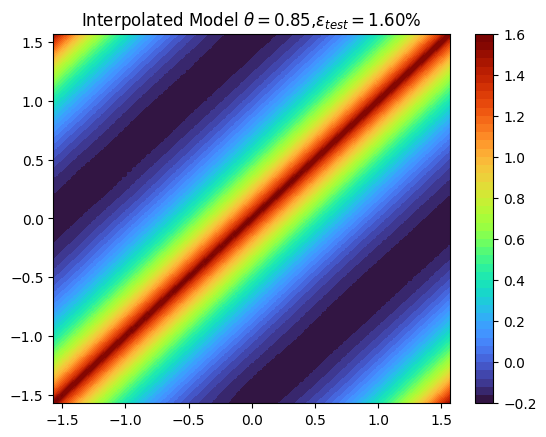

In [14]:
fig = plt.figure()
Ginterp.plot(fig = fig)
error = model.computeEmpiricalError(theta_)
plt.title(f"Interpolated Model $\\theta = {{{theta_:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\\%$")

Text(0.5, 1.0, 'Validation Model $\\theta = {0.85}$,$\\epsilon_{test} = {1.56}\\%$')

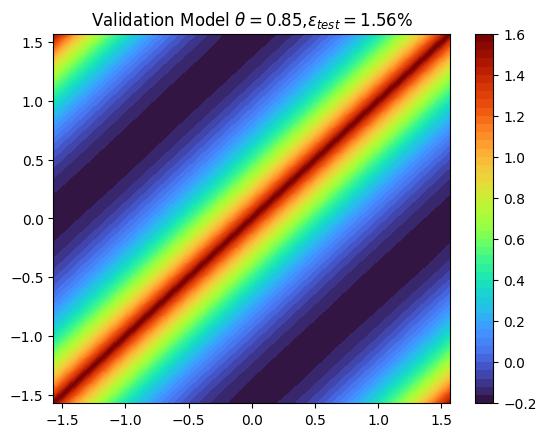

In [15]:
fig = plt.figure()
validation.G[theta_].plot(fig = fig)
error = validation.computeEmpiricalError(theta_)
plt.title(f"Validation Model $\\theta = {{{theta_:4.2f}}}$,$\\epsilon_{{test}} = {{{error*100:4.2f}}}\\%$")

In [16]:
def compareGreen1D(interpModel, exactModel, vmin = None, vmax = None):
    domain = interpModel.domain
    xx = np.linspace(domain[2],domain[3],2000)
    yy = np.linspace(domain[0],domain[1],2000)
    x, s = np.meshgrid(xx,yy)
    
    if vmin is None:
        vmin = min(interpModel.min,exactModel.min)
    if vmax is None:
        vmax = max(interpModel.max,exactModel.max)
        
    plt.figure(figsize = (16,6))
    plt.subplot(121)
    
    GInterp = interpModel[x,s]
    
    levels = np.linspace(vmin, vmax, 50, endpoint = True)
    ticks = np.linspace(vmin, vmax, 10, endpoint=True)
    
    surf = plt.contourf(x, s, GInterp, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    plt.gca().set_aspect('equal', adjustable='box')
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('$x$', fontsize = 11)
    plt.ylabel('$s$', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Interpolated", fontsize = 14)
    
    GExact = exactModel[x,s]
    
    plt.subplot(122)
    plt.gca().set_aspect('equal', adjustable='box')
    surf = plt.contourf(x, s, GExact, levels = levels, cmap = 'turbo', vmin = vmin, vmax = vmax)
    cbar = plt.colorbar(ticks = ticks, fraction = 0.046, pad = 0.04)
    cbar.ax.set_yticklabels(["{:4.2f}".format(i) for i in ticks])
    plt.xlabel('x', fontsize = 11)
    plt.ylabel('s', rotation='horizontal', labelpad=10, fontsize = 11)
    plt.title("Data", fontsize = 14)

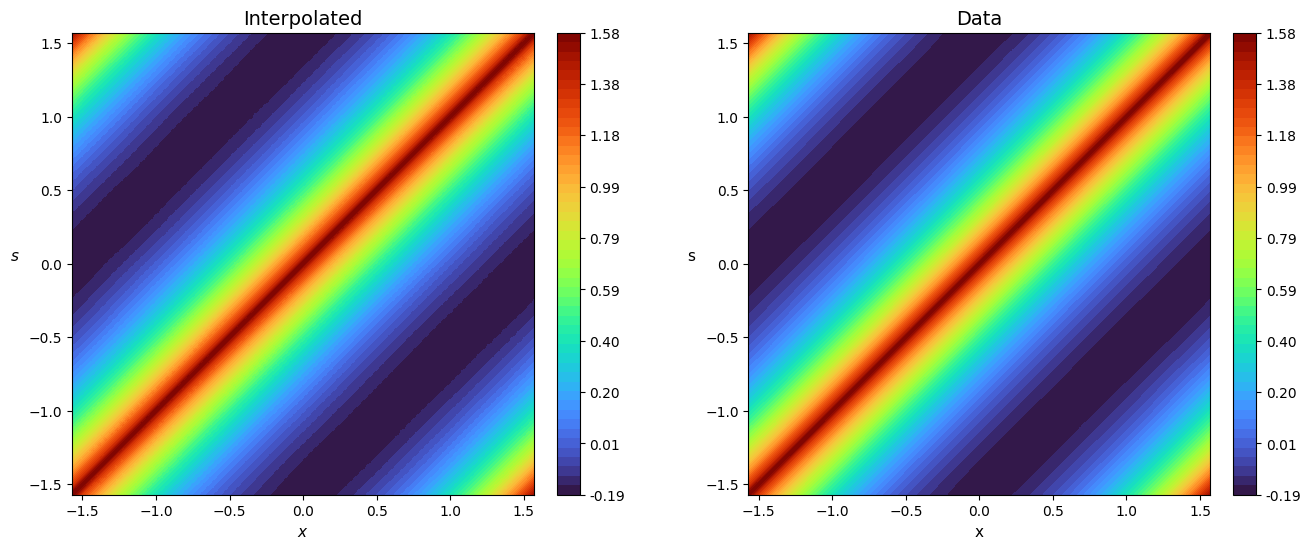

In [17]:
compareGreen1D(Ginterp,validation.G[theta_])